In [622]:
#1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [623]:
#2
df=pd.read_csv("water_quality_train_.csv")
dftest = pd.read_csv("water_quality_test_.csv")

In [624]:
dftest

,Station Code,Name of Monitoring Location,State Name,Temp_Min,Temp_Max,pH_Min,pH_Max,Conductivity_Min,Conductivity_Max,BOD_Min,DOB_Max,Nitrate?N + Nitrite_N Min,Nitrate?N + Nitrite_N Max,Fecal Coliform_Min,Fecal Coliform_Max,Total Coliform_Min,Total Coliform_Max,Total Dissolved Solids_Min,Total Dissolved Solids_Max,Fluoride_Min,Fluoride_Max,Arsenic_Min,Arsenic_Max
0,4637,TUBE WELL AT RAJNAGAR,TRIPURA,23,23.5,6.49,6.55,109,118,BDL,BDL,0.32,0.32,BDL,BDL,BDL,BDL,60,62,BDL,BDL,?,?
1,4638,TUBE WELL AT CHAMPAKNAGAR,TRIPURA,22,23,6.61,6.79,95,114,BDL,BDL,0.32,0.5,BDL,BDL,BDL,BDL,54,60,BDL,BDL,?,?
2,4639,TUBE WELL AT RANIRBAZAR,TRIPURA,22.5,23,6.77,6.85,99,108,BDL,BDL,0.32,0.6,BDL,BDL,BDL,BDL,56,58,BDL,BDL,?,?
3,4641,TUBE WELL AT MELAGHAR,TRIPURA,22,22,5.61,5.87,101,108,BDL,BDL,0.77,?,BDL,BDL,BDL,BDL,60,64,BDL,BDL,?,?
4,4647,TUBE WELL AT MANUBAZAR,TRIPURA,23,23.5,6.78,6.89,100,106,BDL,BDL,0.32,0.32,BDL,BDL,BDL,BDL,52,56,BDL,BDL,?,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,4733,GROUNDWATER AT SUKNAFOREST RANGE,WEST BENGAL,24,28,6.66,7.69,114,125,BDL,BDL,?,?,BDL,BDL,BDL,BDL,72,87,BDL,BDL,BDL,BDL
126,4734,TUBE WELL INSIDE MAHISHADALRAJBARI,WEST BENGAL,29,31,8.05,-8.33,1527,1985,BDL,BDL,0.31,0.41,BDL,BDL,BDL,BDL,1406,1924,0.21,0.22,BDL,BDL
127,4735,TUBE WELL INSIDE MECHEDABUS STAND,WEST BENGAL,27,29,7.46,7.96,751,981,1.4,1.4,?,?,BDL,BDL,BDL,BDL,502,620,0.23,0.23,BDL,BDL
128,4736,TUBE WELL AT OLD DIGHA,WEST BENGAL,29,31,7.56,8.07,3377,3600,BDL,BDL,?,?,BDL,BDL,BDL,BDL,2562,3282,0.23,0.23,BDL,BDL


In [625]:
#3
#preview the dataset
df.head()

,Station Code,Name of Monitoring Location,State Name,Temp_Min,Temp_Max,pH_Min,pH_Max,Conductivity_Min,Conductivity_Max,BOD_Min,DOB_Max,Nitrate?N + Nitrite_N Min,Nitrate?N + Nitrite_N Max,Fecal Coliform_Min,Fecal Coliform_Max,Total Coliform_Min,Total Coliform_Max,Total Dissolved Solids_Min,Total Dissolved Solids_Max,Fluoride_Min,Fluoride_Max,Arsenic_Min,Arsenic_Max,Drinkability
0,26,"BORE WELL AT KANURUPANCHAYAT, VIJAYAWADA",ANDHRA PRADESH,24,24,7.28,7.4,2300,2390,2.2,2.4,3.15,3.77,3,3,11,21,1356,1480,0.38,0.44,BDL,BDL,Not Drinkable
1,1513,"BORE WELL AT AUTONAGAR, VIJAYAWADA.( IN THE R/...",ANDHRA PRADESH,24,24,7.07,7.86,2140,2210,2.2,2.2,1.38,-3.42,3,4,13,20,1260,1328,0.32,0.36,BDL,BDL,Not Drinkable
2,1514,"BORE WELL AT AUTONAGAR, VIJAYAWADA.( IN THE R/...",ANDHRA PRADESH,25,25,-7.21,7.26,1996,2160,2,2.2,3.61,3.99,3,3,11,15,1178,1260,0.68,0.71,0.0019,0.0019,Not Drinkable
3,1516,"BOREWELL OF NAVLOKGARDENS, NELLORE TOWN",ANDHRA PRADESH,20,21,7.85,8.06,1270,1340,1.8,2,1.31,1.43,3,3,14,15,750,790,0.26,0.3,0.0027,0.0027,Not Drinkable
4,1517,"BOREWELL NEAR TUNGBHADRA RIVER, MAMIDALAPADU (...",ANDHRA PRADESH,21,24,7.2,7.5,2068,6410,1.2,1.2,3.12,6.91,9,9,53,53,1349,3846,0.5,1.2,BDL,BDL,Not Drinkable


In [626]:
#4
#Seeing all the numeric columns

[col for col in df.columns if df[col].dtype!='O']

['Station Code']

In [627]:
#5
df['Name of Monitoring Location'].value_counts()

Name of Monitoring Location
TUBE WELL AT BISHALGARH                                          2
TOANSA, PUNJAB                                                   2
ROPAR, PUNJAB                                                    2
NANGAL, PUNJAB                                                   2
MANDI GOBINDGARH, PUNJAB                                         2
                                                                ..
HAND PUMP INSTALLED NEAR PIR BABA MANDIR, SECTOR ? 13,BHIWANI    1
TUBEWELL AT PRITHLA, PALWAL                                      1
TUBEWELL AT HATHIN, PLAWAL                                       1
TUBEWELL AT GARHI, HODAL ,PALWAL                                 1
TUBE WELL AT PANISAGAR                                           1
Name: count, Length: 981, dtype: int64

In [628]:
#6
# Extract the source information from the full string into a new column

source_pattern = r'\b(HAND\s?PUMP|BORE\s?WELL|TUBE\s?WELL|GROUND\s?WATER|OPEN\s?WELL|INDUSTRIAL\s?AREA|\bWELL\b)\b'


df['Source'] = df['Name of Monitoring Location'].str.extract(source_pattern, flags=re.IGNORECASE)
dftest['Source'] = dftest['Name of Monitoring Location'].str.extract(source_pattern, flags=re.IGNORECASE)

### More about REGEX in python
https://www.w3schools.com/python/python_regex.asp

In [629]:
#7
#Remove spaces from the string stored

df['Source'] = df['Source'].str.replace(r'\s+', '')
dftest['Source'] = dftest['Source'].str.replace(r'\s+', '')


In [630]:
#8
# Get the count of different sources 

df['Source'].value_counts()

Source
WELL               206
BOREWELL           159
GROUND WATER       145
HAND PUMP           71
TUBE WELL           66
BORE WELL           62
TUBEWELL            18
HANDPUMP            17
OPENWELL            10
OPEN WELL            8
INDUSTRIAL AREA      3
GROUNDWATER          1
Name: count, dtype: int64

In [631]:
#9
df['Source'].isnull().sum()


223

In [632]:
#10
# Replace BDL values with 0 and ? with null 

df.replace(['BDL','?'],[0,pd.NA],inplace=True)
dftest.replace(['BDL','?'],[0,pd.NA],inplace=True)

In [633]:
#11
# Get the count of different attributes

df['State Name'].value_counts()

State Name
RAJASTHAN            100
ODISHA                89
GUJARAT               84
BIHAR                 70
ASSAM                 66
MADHYA PRADESH        49
HIMACHAL PRADESH      48
TRIPURA               46
DELHI                 45
PUNJAB                43
TELANGANA             42
LAKSHADWEEP           42
MAHARASHTRA           39
KERALA                35
ANDHRA PRADESH        33
MIZORAM               24
PUDUCHERRY            22
TAMIL NADU            21
JAMMU AND KASHMIR     13
HARYANA               13
MEGHALAYA             13
DAMAN AND DIU         12
NAGALAND              10
GOA                    9
MANIPUR                7
CHHATTISGARH           6
CHANDIGARH             4
JHARKHAND              3
KARNATAKA              1
Name: count, dtype: int64

In [634]:
#12
df['BOD_Min'].value_counts()

BOD_Min
0      318
1.1     64
1.2     30
1.4     25
2.2     21
2.4     21
2.3     20
1.6     18
2       18
1.8     16
2.5     16
1.5     15
1.3     12
3.2      8
2.6      8
2.1      8
2.8      6
5        6
3        5
1.7      4
1.9      4
3.4      4
2.7      2
6        2
4.2      2
4.4      2
1        1
3.5      1
5.6      1
4.8      1
3.6      1
269      1
18       1
Name: count, dtype: int64

In [635]:
#13
# Drop the attribute Name of Monitoring Location as it is already replaced by source 

df.drop(columns=['Name of Monitoring Location'],axis=1,inplace=True)
dftest.drop(columns=['Name of Monitoring Location'],axis=1,inplace=True)

In [636]:
#14
# Get the total count of null values in different attributes

df.isnull().sum()

Station Code                    0
State Name                      0
Temp_Min                      115
Temp_Max                      115
pH_Min                          8
pH_Max                         14
Conductivity_Min               53
Conductivity_Max               53
BOD_Min                       327
DOB_Max                       327
Nitrate?N + Nitrite_N Min     141
Nitrate?N + Nitrite_N Max     142
Fecal Coliform_Min            253
Fecal Coliform_Max            250
Total Coliform_Min            245
Total Coliform_Max            245
Total Dissolved Solids_Min    116
Total Dissolved Solids_Max    116
Fluoride_Min                  200
Fluoride_Max                  200
Arsenic_Min                   610
Arsenic_Max                   610
Drinkability                    0
Source                        223
dtype: int64

In [637]:
#15
# Get the median value for all of the numeric columns 

median=df[[val for val in df.columns if (val!='State Name' and val!='Source' and val!='Drinkability')]].median()
mediantest=dftest[[val for val in dftest.columns if (val!='State Name' and val!='Source')]].median()

In [638]:
#16
median

Station Code                  3220.0
Temp_Min                        26.0
Temp_Max                        27.7
pH_Min                           7.2
pH_Max                          7.45
Conductivity_Min               690.0
Conductivity_Max               899.0
BOD_Min                          1.1
DOB_Max                          1.1
Nitrate?N + Nitrite_N Min       0.92
Nitrate?N + Nitrite_N Max       1.87
Fecal Coliform_Min               2.0
Fecal Coliform_Max               2.0
Total Coliform_Min               7.0
Total Coliform_Max              12.0
Total Dissolved Solids_Min     502.0
Total Dissolved Solids_Max     620.0
Fluoride_Min                    0.31
Fluoride_Max                    0.43
Arsenic_Min                      0.0
Arsenic_Max                      0.0
dtype: object

In [639]:
#17
#fill all the null values with the median values of the respective column

df.fillna(median,inplace=True)
dftest.fillna(mediantest,inplace=True)

In [640]:
#18
df['Temp_Max'].value_counts()

Temp_Max
27.700000000000003    115
28                    101
29                     83
27                     83
30                     73
                     ... 
26.8                    1
32.5                    1
34.8                    1
32.7                    1
26.2                    1
Name: count, Length: 89, dtype: int64

In [641]:
#19
df.isnull().sum()

Station Code                    0
State Name                      0
Temp_Min                        0
Temp_Max                        0
pH_Min                          0
pH_Max                          0
Conductivity_Min                0
Conductivity_Max                0
BOD_Min                         0
DOB_Max                         0
Nitrate?N + Nitrite_N Min       0
Nitrate?N + Nitrite_N Max       0
Fecal Coliform_Min              0
Fecal Coliform_Max              0
Total Coliform_Min              0
Total Coliform_Max              0
Total Dissolved Solids_Min      0
Total Dissolved Solids_Max      0
Fluoride_Min                    0
Fluoride_Max                    0
Arsenic_Min                     0
Arsenic_Max                     0
Drinkability                    0
Source                        223
dtype: int64

In [642]:
#20
# Perform One hot encoding for the 'Source' column 

encoded_data = pd.get_dummies(df['Source'], dummy_na=True, prefix='Type')
encoded_datatest = pd.get_dummies(dftest['Source'], dummy_na=True, prefix='Type')

# Concatenate the encoded data with the original DataFrame
df = pd.concat([df, encoded_data], axis=1)
dftest = pd.concat([dftest, encoded_datatest], axis=1)

# Drop the original 'Source' column if needed
df.drop('Source', axis=1,inplace=True)
dftest.drop('Source', axis=1,inplace=True)

In [643]:
#21
dftest.head()

,Station Code,State Name,Temp_Min,Temp_Max,pH_Min,pH_Max,Conductivity_Min,Conductivity_Max,BOD_Min,DOB_Max,Nitrate?N + Nitrite_N Min,Nitrate?N + Nitrite_N Max,Fecal Coliform_Min,Fecal Coliform_Max,Total Coliform_Min,Total Coliform_Max,Total Dissolved Solids_Min,Total Dissolved Solids_Max,Fluoride_Min,Fluoride_Max,Arsenic_Min,Arsenic_Max,Type_BORE WELL,Type_GROUND WATER,Type_GROUNDWATER,Type_HAND PUMP,Type_HANDPUMP,Type_INDUSTRIAL AREA,Type_TUBE WELL,Type_WELL,Type_nan
0,4637,TRIPURA,23,23.5,6.49,6.55,109,118,0,0,0.32,0.32,0,0,0,0,60,62,0,0,0.0,0.0,False,False,False,False,False,False,True,False,False
1,4638,TRIPURA,22,23,6.61,6.79,95,114,0,0,0.32,0.5,0,0,0,0,54,60,0,0,0.0,0.0,False,False,False,False,False,False,True,False,False
2,4639,TRIPURA,22.5,23,6.77,6.85,99,108,0,0,0.32,0.6,0,0,0,0,56,58,0,0,0.0,0.0,False,False,False,False,False,False,True,False,False
3,4641,TRIPURA,22,22,5.61,5.87,101,108,0,0,0.77,0.6,0,0,0,0,60,64,0,0,0.0,0.0,False,False,False,False,False,False,True,False,False
4,4647,TRIPURA,23,23.5,6.78,6.89,100,106,0,0,0.32,0.32,0,0,0,0,52,56,0,0,0.0,0.0,False,False,False,False,False,False,True,False,False


In [644]:
dftest.head()

,Station Code,State Name,Temp_Min,Temp_Max,pH_Min,pH_Max,Conductivity_Min,Conductivity_Max,BOD_Min,DOB_Max,Nitrate?N + Nitrite_N Min,Nitrate?N + Nitrite_N Max,Fecal Coliform_Min,Fecal Coliform_Max,Total Coliform_Min,Total Coliform_Max,Total Dissolved Solids_Min,Total Dissolved Solids_Max,Fluoride_Min,Fluoride_Max,Arsenic_Min,Arsenic_Max,Type_BORE WELL,Type_GROUND WATER,Type_GROUNDWATER,Type_HAND PUMP,Type_HANDPUMP,Type_INDUSTRIAL AREA,Type_TUBE WELL,Type_WELL,Type_nan
0,4637,TRIPURA,23,23.5,6.49,6.55,109,118,0,0,0.32,0.32,0,0,0,0,60,62,0,0,0.0,0.0,False,False,False,False,False,False,True,False,False
1,4638,TRIPURA,22,23,6.61,6.79,95,114,0,0,0.32,0.5,0,0,0,0,54,60,0,0,0.0,0.0,False,False,False,False,False,False,True,False,False
2,4639,TRIPURA,22.5,23,6.77,6.85,99,108,0,0,0.32,0.6,0,0,0,0,56,58,0,0,0.0,0.0,False,False,False,False,False,False,True,False,False
3,4641,TRIPURA,22,22,5.61,5.87,101,108,0,0,0.77,0.6,0,0,0,0,60,64,0,0,0.0,0.0,False,False,False,False,False,False,True,False,False
4,4647,TRIPURA,23,23.5,6.78,6.89,100,106,0,0,0.32,0.32,0,0,0,0,52,56,0,0,0.0,0.0,False,False,False,False,False,False,True,False,False


In [645]:
#22
df.describe()

,Station Code
count,989.000000
mean,3194.746208
std,1140.793397
min,3.000000
25%,2096.000000
50%,3220.000000
75%,4190.000000
max,5258.000000


In [646]:
#23
# Use LabelEncoder to encode the 'State' attribute to numeric values 

from sklearn.preprocessing import LabelEncoder

In [647]:
#24
lb=LabelEncoder()
df['State Name N']=lb.fit_transform(df['State Name'])
dftest['State Name N']=lb.fit_transform(dftest['State Name'])

In [648]:
#25
df.drop(columns=['State Name'],axis=1,inplace=True)
dftest.drop(columns=['State Name'],axis=1,inplace=True)

In [649]:
#26
df.describe()

,Station Code,State Name N
count,989.000000,989.000000
mean,3194.746208,14.853387
std,1140.793397,9.110308
min,3.000000,0.000000
25%,2096.000000,8.000000
50%,3220.000000,16.000000
75%,4190.000000,24.000000
max,5258.000000,28.000000


In [650]:
#27
# Convert the attributes to floating type 

df[[val for val in df.columns if val!='Drinkability']]=df[[val for val in df.columns if val!='Drinkability']].astype(float)

In [651]:
#28
df.describe()
df.drop(columns='Station Code',axis=1,inplace=True)
stationcode = dftest['Station Code']
dftest.drop(columns='Station Code',axis=1,inplace=True)


In [652]:
#29
df1=df.copy()

In [653]:
#30
df.head()

,Temp_Min,Temp_Max,pH_Min,pH_Max,Conductivity_Min,Conductivity_Max,BOD_Min,DOB_Max,Nitrate?N + Nitrite_N Min,Nitrate?N + Nitrite_N Max,Fecal Coliform_Min,Fecal Coliform_Max,Total Coliform_Min,Total Coliform_Max,Total Dissolved Solids_Min,Total Dissolved Solids_Max,Fluoride_Min,Fluoride_Max,Arsenic_Min,Arsenic_Max,Drinkability,Type_BORE WELL,Type_BOREWELL,Type_GROUND WATER,Type_GROUNDWATER,Type_HAND PUMP,Type_HANDPUMP,Type_INDUSTRIAL AREA,Type_OPEN WELL,Type_OPENWELL,Type_TUBE WELL,Type_TUBEWELL,Type_WELL,Type_nan,State Name N
0,24.0,24.0,7.28,7.40,2300.0,2390.0,2.2,2.4,3.15,3.77,3.0,3.0,11.0,21.0,1356.0,1480.0,0.38,0.44,0.0000,0.0000,Not Drinkable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24.0,24.0,7.07,7.86,2140.0,2210.0,2.2,2.2,1.38,-3.42,3.0,4.0,13.0,20.0,1260.0,1328.0,0.32,0.36,0.0000,0.0000,Not Drinkable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25.0,25.0,-7.21,7.26,1996.0,2160.0,2.0,2.2,3.61,3.99,3.0,3.0,11.0,15.0,1178.0,1260.0,0.68,0.71,0.0019,0.0019,Not Drinkable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20.0,21.0,7.85,8.06,1270.0,1340.0,1.8,2.0,1.31,1.43,3.0,3.0,14.0,15.0,750.0,790.0,0.26,0.30,0.0027,0.0027,Not Drinkable,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,21.0,24.0,7.20,7.50,2068.0,6410.0,1.2,1.2,3.12,6.91,9.0,9.0,53.0,53.0,1349.0,3846.0,0.50,1.20,0.0000,0.0000,Not Drinkable,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


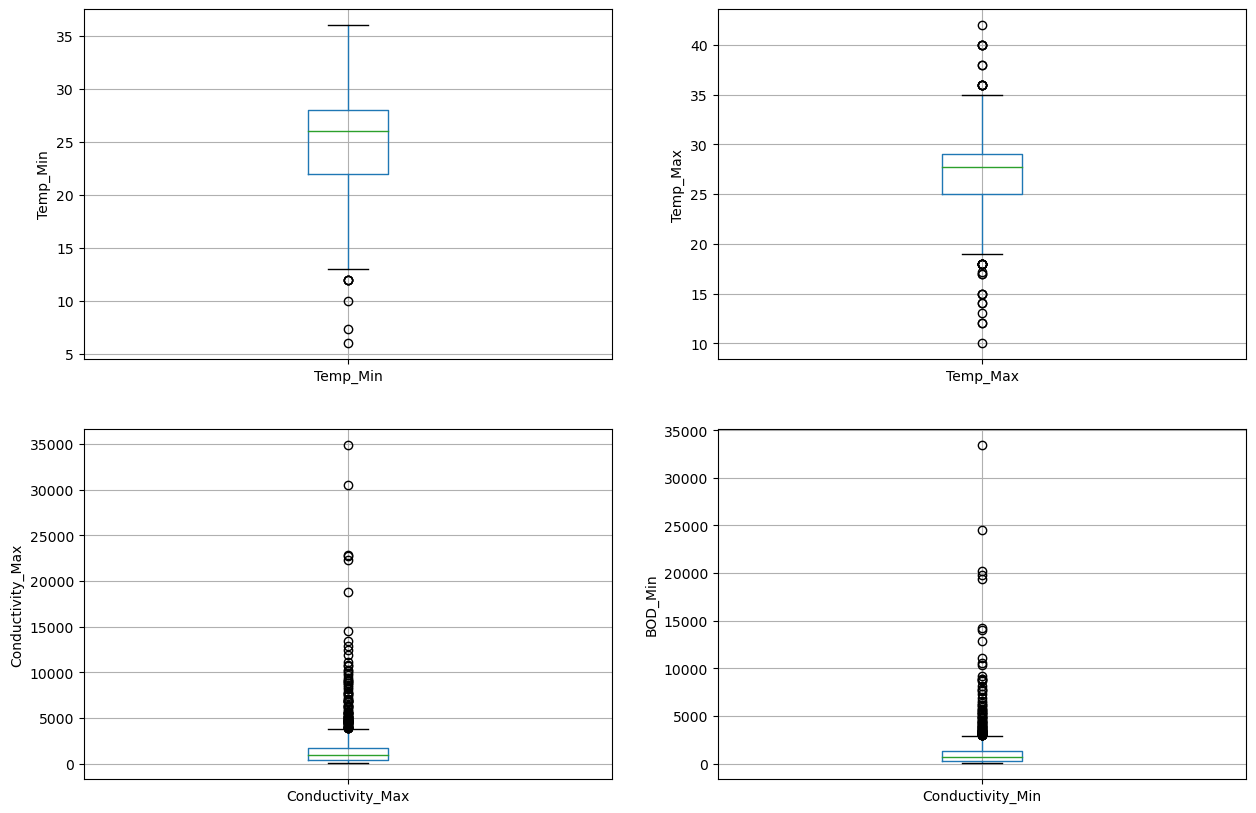

In [654]:
#31
# Plot the different attributes to look for outliers 

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Temp_Min')
fig.set_title('')
fig.set_ylabel('Temp_Min')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Temp_Max')
fig.set_title('')
fig.set_ylabel('Temp_Max')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='Conductivity_Max')
fig.set_title('')
fig.set_ylabel('Conductivity_Max')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='Conductivity_Min')
fig.set_title('')
fig.set_ylabel('BOD_Min')
plt.show()

In [655]:
#32
# find outliers for different  variables

lower_limit=df.Temp_Max.mean()- 9*df.Temp_Max.std()
upper_limit=df.Temp_Max.mean()+ 9*df.Temp_Max.std()

In [656]:
#33
# drop the rows containing values outside the cap
df.loc[df['Temp_Max']>upper_limit,'Temp_Max']=upper_limit
df.loc[df['Temp_Max']<lower_limit,'Temp_Max']=lower_limit

In [657]:
#34
lower_limit=df.Conductivity_Min.mean()- 9*df.Conductivity_Min.std()
upper_limit=df.Conductivity_Min.mean()+ 9*df.Conductivity_Min.std()

In [658]:
#35
df.loc[df['Conductivity_Min']>upper_limit,'Conductivity_Min']=upper_limit
df.loc[df['Conductivity_Min']<lower_limit,'Conductivity_Min']=lower_limit

In [659]:
#36
lower_limit=df.Conductivity_Max.mean()- 9*df.Conductivity_Max.std()
upper_limit=df.Conductivity_Max.mean()+ 9*df.Conductivity_Max.std()

In [660]:
#37
df.loc[df['Conductivity_Max']>upper_limit,'Conductivity_Max']=upper_limit
df.loc[df['Conductivity_Max']<lower_limit,'Conductivity_Max']=lower_limit

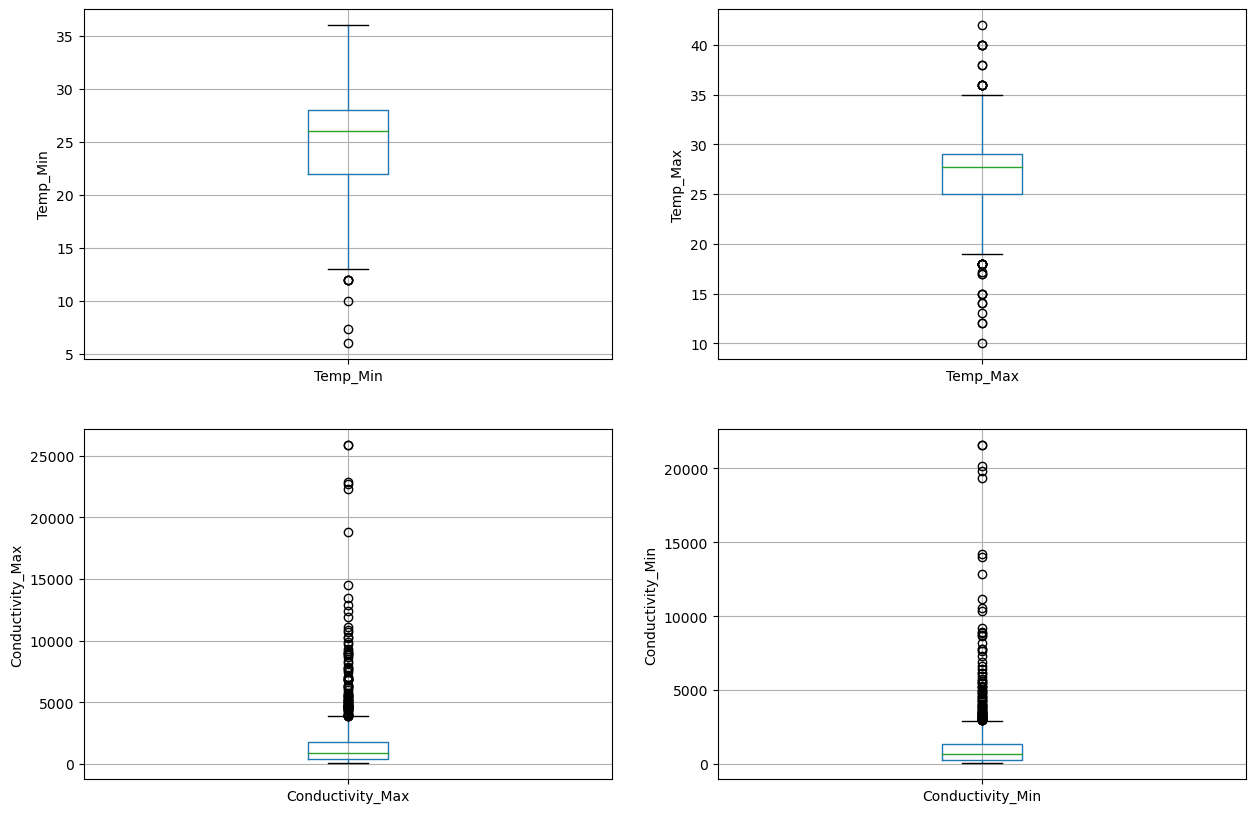

In [661]:
#38
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Temp_Min')
fig.set_title('')
fig.set_ylabel('Temp_Min')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Temp_Max')
fig.set_title('')
fig.set_ylabel('Temp_Max')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='Conductivity_Max')
fig.set_title('')
fig.set_ylabel('Conductivity_Max')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='Conductivity_Min')
fig.set_title('')
fig.set_ylabel('Conductivity_Min')
plt.show()

In [662]:
#39
pd.set_option('display.max_columns', None)
df.describe()

,Temp_Min,Temp_Max,pH_Min,pH_Max,Conductivity_Min,Conductivity_Max,BOD_Min,DOB_Max,Nitrate?N + Nitrite_N Min,Nitrate?N + Nitrite_N Max,Fecal Coliform_Min,Fecal Coliform_Max,Total Coliform_Min,Total Coliform_Max,Total Dissolved Solids_Min,Total Dissolved Solids_Max,Fluoride_Min,Fluoride_Max,Arsenic_Min,Arsenic_Max,Type_BORE WELL,Type_BOREWELL,Type_GROUND WATER,Type_GROUNDWATER,Type_HAND PUMP,Type_HANDPUMP,Type_INDUSTRIAL AREA,Type_OPEN WELL,Type_OPENWELL,Type_TUBE WELL,Type_TUBEWELL,Type_WELL,Type_nan,State Name N
count,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.00000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.00000,989.000000
mean,25.022952,27.036704,7.026067,7.556785,1251.643355,1631.995209,1.323054,1.462184,2.219808,4.092376,29.413347,37.962588,61.450556,99.042568,828.775379,1057.903893,1.256481,1.668817,0.001200,0.001298,0.062690,0.160768,0.146613,0.001011,0.07179,0.017189,0.003033,0.008089,0.010111,0.066734,0.018200,0.208291,0.22548,14.853387
std,3.887305,3.779445,1.831677,3.127736,2083.205474,2544.043836,8.589738,8.752374,3.695108,14.016536,169.830606,198.745377,244.881909,383.621495,1390.634887,1705.768550,26.707674,35.224431,0.003267,0.003742,0.242526,0.367503,0.353898,0.031798,0.25827,0.130041,0.055020,0.089620,0.100096,0.249687,0.133742,0.406292,0.41811,9.110308
min,6.000000,10.000000,-7.780000,-7.830000,43.000000,49.000000,0.000000,0.000000,0.000000,-9.980000,-28.000000,0.000000,0.000000,0.000000,28.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,22.000000,25.000000,6.860000,7.170000,286.000000,356.000000,0.000000,0.000000,0.470000,0.750000,0.000000,0.000000,0.000000,0.000000,222.000000,306.000000,0.250000,0.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,8.000000
50%,26.000000,27.700000,7.200000,7.450000,690.000000,899.000000,1.100000,1.100000,0.920000,1.870000,2.000000,2.000000,7.000000,12.000000,502.000000,620.000000,0.310000,0.430000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,16.000000
75%,28.000000,29.000000,7.500000,7.800000,1353.000000,1759.000000,1.300000,1.400000,2.300000,4.390000,4.000000,6.100000,17.000000,25.000000,902.000000,1128.000000,0.480000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,24.000000
max,36.000000,42.000000,27.730000,77.480000,21587.639138,25872.630939,269.000000,269.000000,36.240000,408.000000,2400.000000,3800.000000,3500.000000,7000.000000,23400.000000,23660.000000,840.000000,1108.000000,0.020000,0.040000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,28.000000


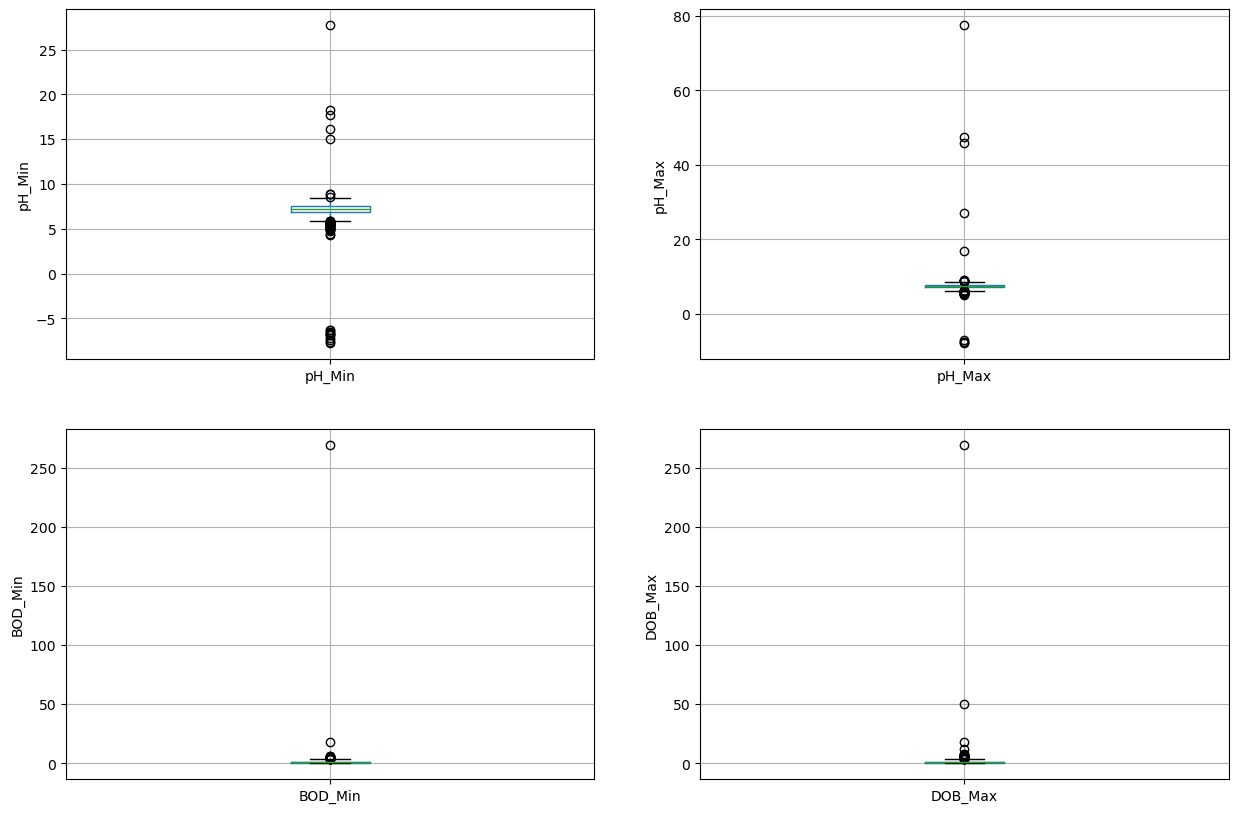

In [663]:
#40
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='pH_Min')
fig.set_title('')
fig.set_ylabel('pH_Min')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='pH_Max')
fig.set_title('')
fig.set_ylabel('pH_Max')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='BOD_Min')
fig.set_title('')
fig.set_ylabel('BOD_Min')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='DOB_Max')
fig.set_title('')
fig.set_ylabel('DOB_Max')
plt.show()

In [664]:
#41
q1=df.pH_Max.quantile(0.25)
q3=df.pH_Max.quantile(0.75)
IQR=q3-q1
lower_limit=q1- 10*IQR
upper_limit=q3 + 10*IQR

In [665]:
#42
df.drop(df[(df['pH_Min']>upper_limit)|(df['pH_Min']<lower_limit)].index,axis=0,inplace=True)

In [666]:
#43
df.loc[df['pH_Max']>upper_limit,'pH_Max']=upper_limit
df.loc[df['pH_Max']<lower_limit,'pH_Max']=lower_limit

In [667]:
#44
q1=df.pH_Min.quantile(0.25)
q3=df.pH_Min.quantile(0.75)
IQR=q3-q1
lower_limit=q1- 10*IQR
upper_limit=q3 + 10*IQR

In [668]:
#45
df.loc[df['pH_Min']>upper_limit,'pH_Min']=upper_limit
df.loc[df['pH_Min']<lower_limit,'pH_Min']=lower_limit

In [669]:
#46
q1=df['BOD_Min'].quantile(0.25)
q3=df['BOD_Min'].quantile(0.75)
IQR=q3-q1
lower_limit=q1- 3*IQR
upper_limit=q3 + 3*IQR

In [670]:
#47
df.loc[df['BOD_Min']>upper_limit,'BOD_Min']=upper_limit
df.loc[df['BOD_Min']<lower_limit,'BOD_Min']=lower_limit

In [671]:
#48
q1=df['DOB_Max'].quantile(0.25)
q3=df['DOB_Max'].quantile(0.75)
IQR=q3-q1
lower_limit=q1- 3*IQR
upper_limit=q3 + 3*IQR

In [672]:
#49
df.loc[df['DOB_Max']>upper_limit,'DOB_Max']=upper_limit
df.loc[df['DOB_Max']<lower_limit,'DOB_Max']=lower_limit

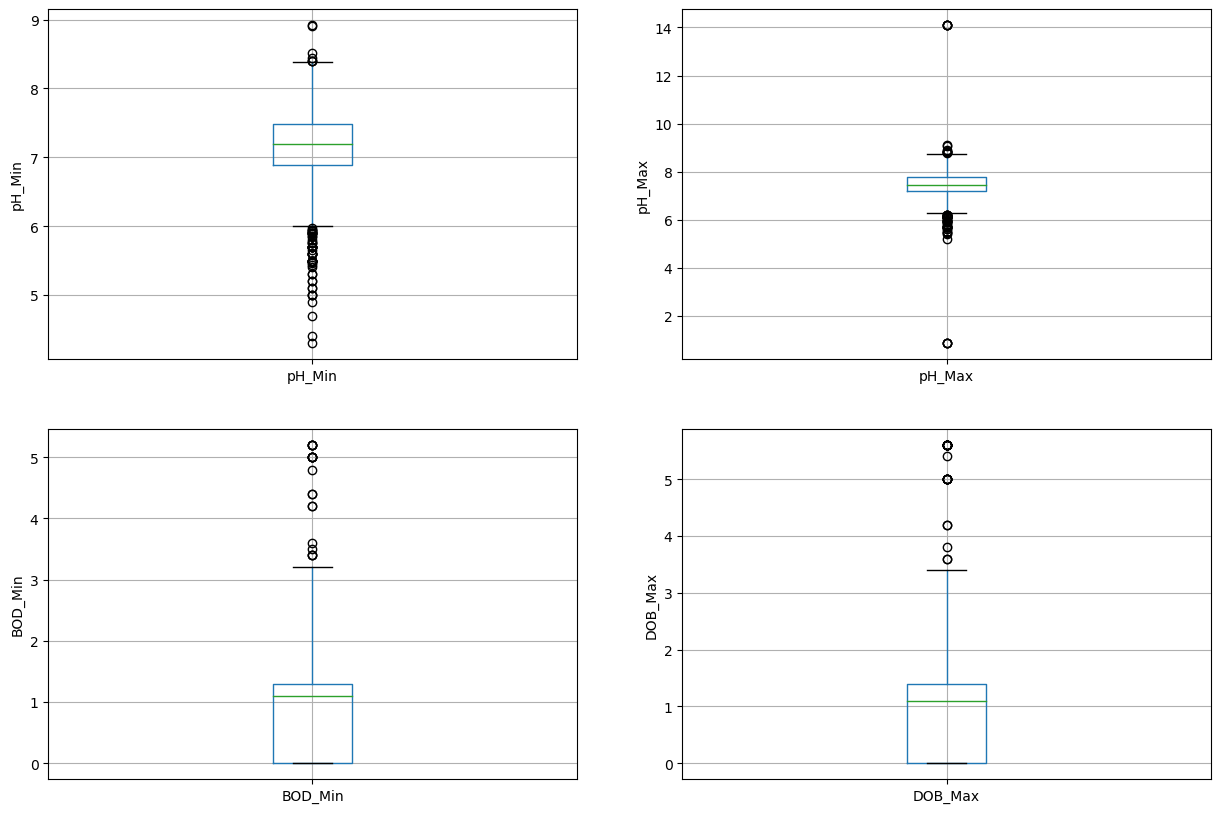

In [673]:
#50
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.boxplot(column='pH_Min')
fig.set_title('')
fig.set_ylabel('pH_Min')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='pH_Max')
fig.set_title('')
fig.set_ylabel('pH_Max')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='BOD_Min')
fig.set_title('')
fig.set_ylabel('BOD_Min')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='DOB_Max')
fig.set_title('')
fig.set_ylabel('DOB_Max')
plt.show()

In [674]:
#51
df.describe()

,Temp_Min,Temp_Max,pH_Min,pH_Max,Conductivity_Min,Conductivity_Max,BOD_Min,DOB_Max,Nitrate?N + Nitrite_N Min,Nitrate?N + Nitrite_N Max,Fecal Coliform_Min,Fecal Coliform_Max,Total Coliform_Min,Total Coliform_Max,Total Dissolved Solids_Min,Total Dissolved Solids_Max,Fluoride_Min,Fluoride_Max,Arsenic_Min,Arsenic_Max,Type_BORE WELL,Type_BOREWELL,Type_GROUND WATER,Type_GROUNDWATER,Type_HAND PUMP,Type_HANDPUMP,Type_INDUSTRIAL AREA,Type_OPEN WELL,Type_OPENWELL,Type_TUBE WELL,Type_TUBEWELL,Type_WELL,Type_nan,State Name N
count,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,25.011202,27.04409,7.122631,7.447235,1256.604603,1636.455562,1.044913,1.121583,2.225355,4.121644,29.849743,38.525180,62.211305,100.376259,832.671326,1060.695735,1.272189,1.690051,0.001198,0.001297,0.062693,0.158273,0.146968,0.001028,0.071942,0.016444,0.003083,0.008222,0.009250,0.066804,0.018499,0.208633,0.228160,14.859198
std,3.890154,3.78210,0.596666,0.858734,2097.259982,2558.229677,0.955269,1.104558,3.707265,14.123367,171.187308,200.323713,246.785264,386.597492,1400.314868,1714.796791,26.926273,35.512721,0.003266,0.003749,0.242534,0.365185,0.354256,0.032059,0.258525,0.127241,0.055470,0.090348,0.095779,0.249810,0.134818,0.406541,0.419862,9.099683
min,6.000000,10.00000,4.300000,0.870000,43.000000,49.000000,0.000000,0.000000,0.000000,-9.980000,-28.000000,0.000000,0.000000,0.000000,28.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,25.00000,6.890000,7.180000,287.000000,358.000000,0.000000,0.000000,0.470000,0.760000,0.000000,0.000000,0.000000,0.000000,229.000000,308.000000,0.250000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
50%,26.000000,27.70000,7.200000,7.450000,690.000000,899.000000,1.100000,1.100000,0.920000,1.870000,2.000000,2.000000,7.000000,12.000000,502.000000,620.000000,0.310000,0.430000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000
75%,28.000000,29.00000,7.490000,7.800000,1350.000000,1753.000000,1.300000,1.400000,2.300000,4.410000,4.000000,6.100000,17.000000,25.000000,902.000000,1124.000000,0.480000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000
max,36.000000,42.00000,8.920000,14.100000,21587.639138,25872.630939,5.200000,5.600000,36.240000,408.000000,2400.000000,3800.000000,3500.000000,7000.000000,23400.000000,23660.000000,840.000000,1108.000000,0.020000,0.040000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,28.000000


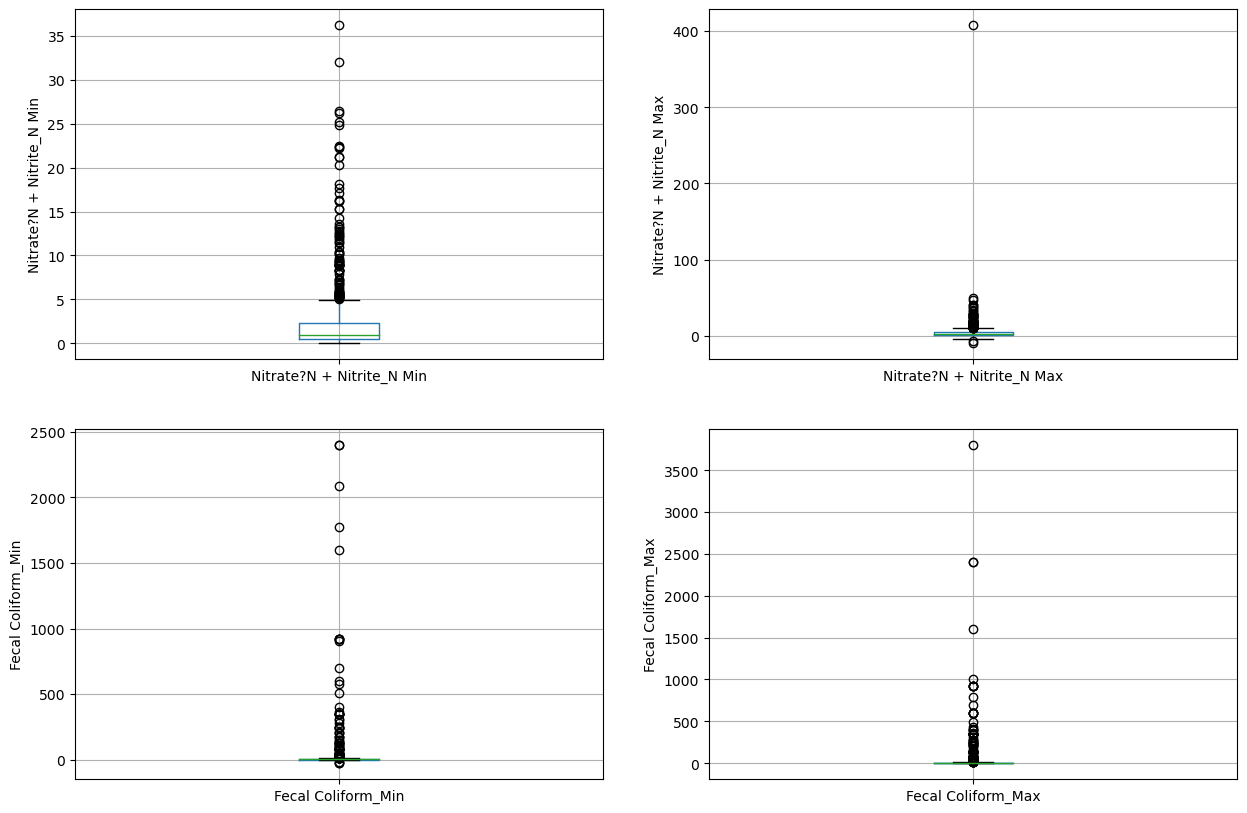

In [675]:
#52
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Nitrate?N + Nitrite_N Min')
fig.set_title('')
fig.set_ylabel('Nitrate?N + Nitrite_N Min')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Nitrate?N + Nitrite_N Max')
fig.set_title('')
fig.set_ylabel('Nitrate?N + Nitrite_N Max')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='Fecal Coliform_Min')
fig.set_title('')
fig.set_ylabel('Fecal Coliform_Min')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='Fecal Coliform_Max')
fig.set_title('')
fig.set_ylabel('Fecal Coliform_Max')
plt.show()

In [676]:
#53
q1=df['Nitrate?N + Nitrite_N Max'].quantile(0.25)
q3=df['Nitrate?N + Nitrite_N Max'].quantile(0.75)
IQR=q3-q1
lower_limit=df['Nitrate?N + Nitrite_N Max'].mean()- 2*df['Nitrate?N + Nitrite_N Max'].std()
upper_limit=df['Nitrate?N + Nitrite_N Max'].mean()+ 3*df['Nitrate?N + Nitrite_N Max'].std()

In [677]:
#54
df.loc[df['Nitrate?N + Nitrite_N Max']>upper_limit,'Nitrate?N + Nitrite_N Max']=upper_limit
df.loc[df['Nitrate?N + Nitrite_N Max']<lower_limit,'Nitrate?N + Nitrite_N Max']=lower_limit

In [678]:
#55
lower_limit=df['Total Coliform_Max'].mean()- 2*df['Total Coliform_Max'].std()
upper_limit=df['Total Coliform_Max'].mean()+ 15*df['Total Coliform_Max'].std()

In [679]:
#56
df.loc[df['Total Coliform_Max']>upper_limit,'Total Coliform_Max']=upper_limit
df.loc[df['Total Coliform_Max']<lower_limit,'Total Coliform_Max']=lower_limit

In [680]:
#57
lower_limit=df['Fecal Coliform_Max'].mean()- 2*df['Fecal Coliform_Max'].std()
upper_limit=df['Fecal Coliform_Max'].mean()+ 30*df['Fecal Coliform_Max'].std()

In [681]:
#58
df.loc[df['Fecal Coliform_Max']>upper_limit,'Fecal Coliform_Max']=upper_limit
df.loc[df['Fecal Coliform_Max']<lower_limit,'Fecal Coliform_Max']=lower_limit

In [682]:
#59
q1=df['Fecal Coliform_Min'].quantile(0.25)
q3=df['Fecal Coliform_Min'].quantile(0.75)
IQR=q3-q1
lower_limit=df['Fecal Coliform_Min'].mean()- 2*df['Fecal Coliform_Min'].std()
upper_limit=df['Fecal Coliform_Min'].mean()+ 10*df['Fecal Coliform_Min'].std()

In [683]:
#60
df.loc[df['Fecal Coliform_Min']>upper_limit,'Fecal Coliform_Min']=upper_limit
df.loc[df['Fecal Coliform_Min']<lower_limit,'Fecal Coliform_Min']=lower_limit

In [684]:
#61
lower_limit=df['Total Dissolved Solids_Min'].mean()- 2*df['Total Dissolved Solids_Min'].std()
upper_limit=df['Total Dissolved Solids_Min'].mean()+ 5*df['Total Dissolved Solids_Min'].std()

In [685]:
#62
df.loc[df['Total Dissolved Solids_Min']>upper_limit,'Total Dissolved Solids_Min']=upper_limit
df.loc[df['Total Dissolved Solids_Min']<lower_limit,'Total Dissolved Solids_Min']=lower_limit

In [686]:
#63
lower_limit=df['Total Dissolved Solids_Max'].mean()- 2*df['Total Dissolved Solids_Max'].std()
upper_limit=df['Total Dissolved Solids_Max'].mean()+ 5*df['Total Dissolved Solids_Max'].std()

In [687]:
#64
df.loc[df['Total Dissolved Solids_Max']>upper_limit,'Total Dissolved Solids_Max']=upper_limit
df.loc[df['Total Dissolved Solids_Max']<lower_limit,'Total Dissolved Solids_Max']=lower_limit

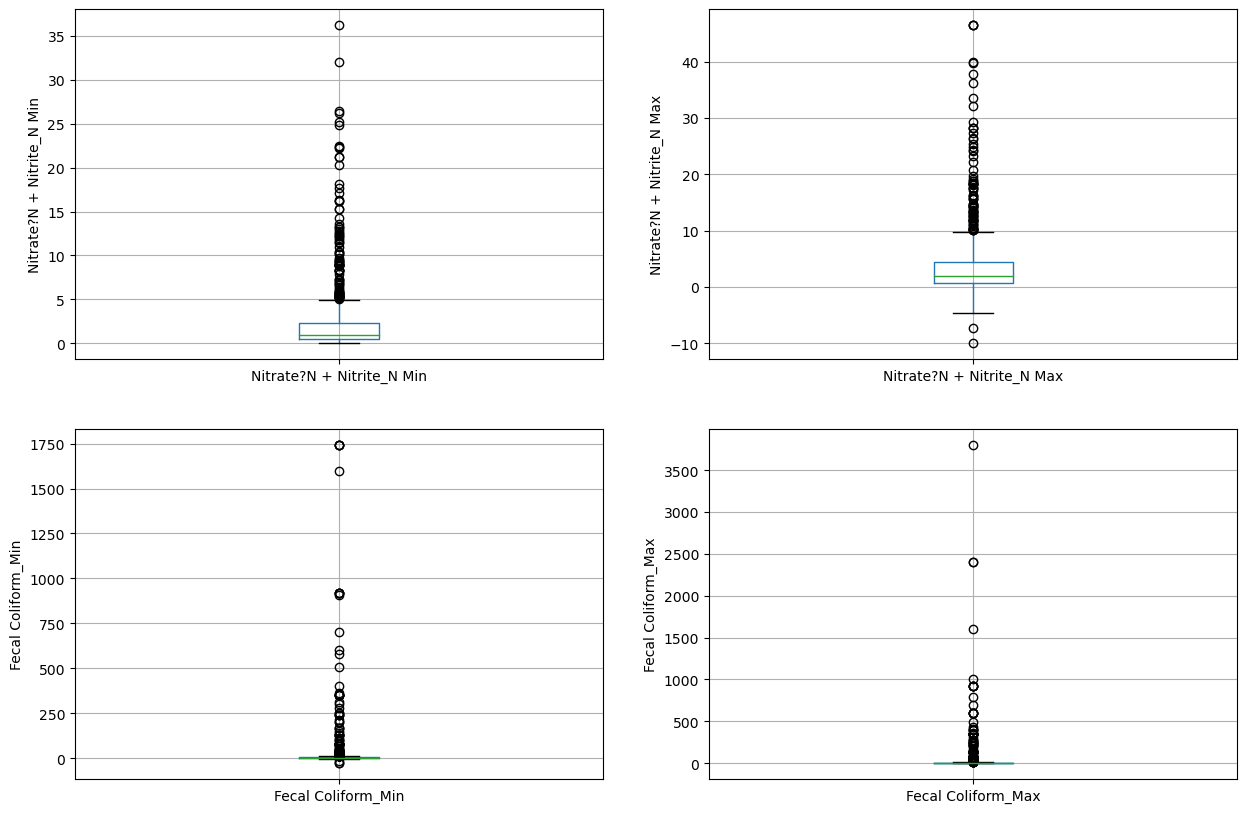

In [688]:
#65
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Nitrate?N + Nitrite_N Min')
fig.set_title('')
fig.set_ylabel('Nitrate?N + Nitrite_N Min')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Nitrate?N + Nitrite_N Max')
fig.set_title('')
fig.set_ylabel('Nitrate?N + Nitrite_N Max')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='Fecal Coliform_Min')
fig.set_title('')
fig.set_ylabel('Fecal Coliform_Min')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='Fecal Coliform_Max')
fig.set_title('')
fig.set_ylabel('Fecal Coliform_Max')
plt.show()

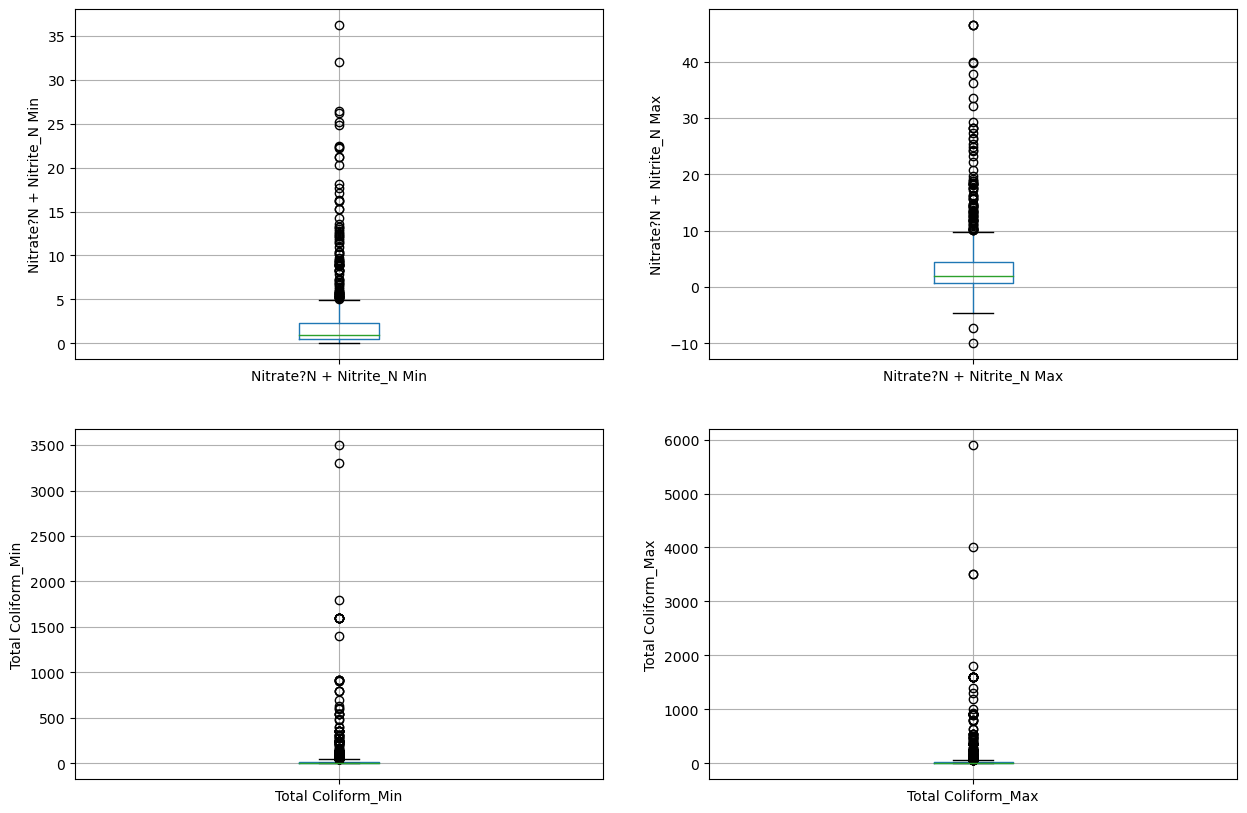

In [689]:
#66
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Nitrate?N + Nitrite_N Min')
fig.set_title('')
fig.set_ylabel('Nitrate?N + Nitrite_N Min')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Nitrate?N + Nitrite_N Max')
fig.set_title('')
fig.set_ylabel('Nitrate?N + Nitrite_N Max')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='Total Coliform_Min')
fig.set_title('')
fig.set_ylabel('Total Coliform_Min')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='Total Coliform_Max')
fig.set_title('')
fig.set_ylabel('Total Coliform_Max')
plt.show()

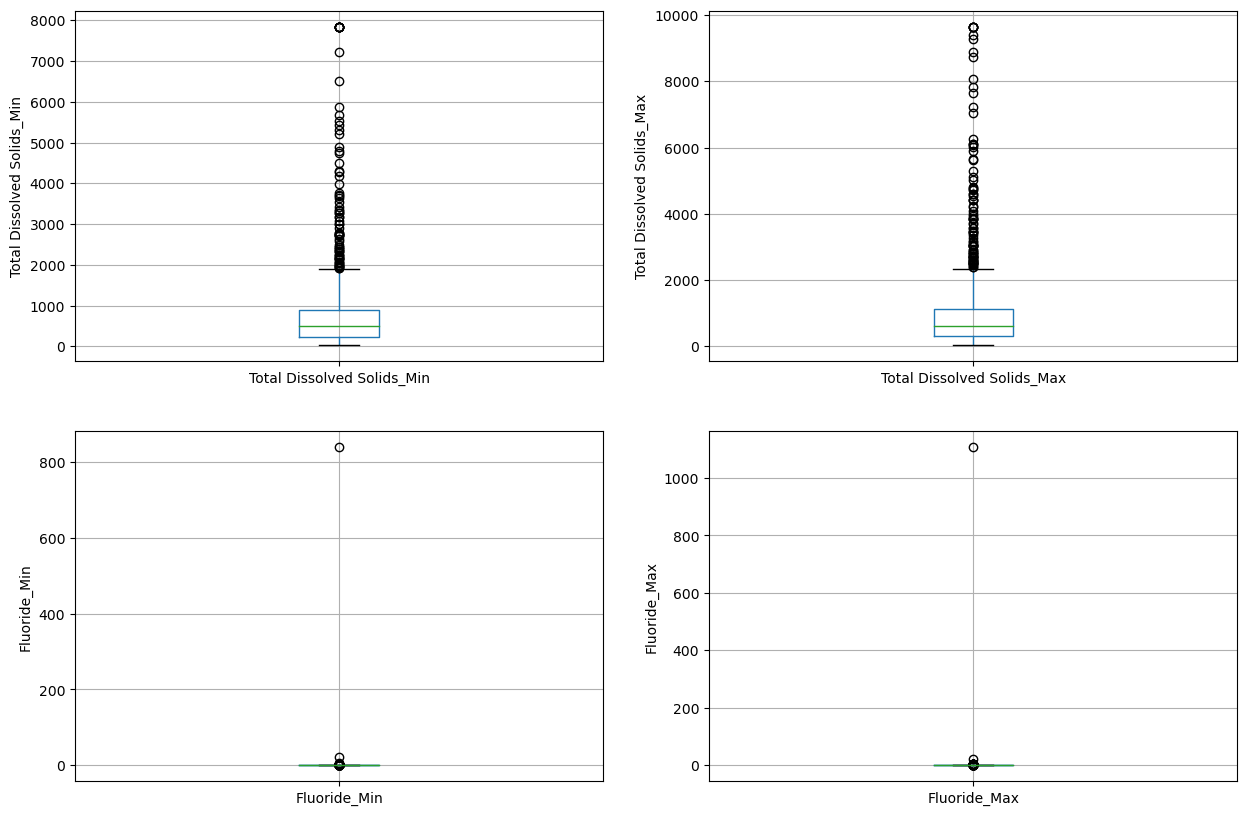

In [690]:
#67
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Total Dissolved Solids_Min')
fig.set_title('')
fig.set_ylabel('Total Dissolved Solids_Min')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Total Dissolved Solids_Max')
fig.set_title('')
fig.set_ylabel('Total Dissolved Solids_Max')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='Fluoride_Min')
fig.set_title('')
fig.set_ylabel('Fluoride_Min')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='Fluoride_Max')
fig.set_title('')
fig.set_ylabel('Fluoride_Max')
plt.show()

In [691]:
#68
q1=df['Fluoride_Min'].quantile(0.25)
q3=df['Fluoride_Min'].quantile(0.75)
IQR=q3-q1
lower_limit=q1- 2*IQR
upper_limit=q3 + 15*IQR

In [692]:
#69
df.loc[df['Fluoride_Min']>upper_limit,'Fluoride_Min']=upper_limit
df.loc[df['Fluoride_Min']<lower_limit,'Fluoride_Min']=lower_limit

In [693]:
#70
q1=df['Fluoride_Max'].quantile(0.25)
q3=df['Fluoride_Max'].quantile(0.75)
IQR=q3-q1
lower_limit=q1- 2*IQR
upper_limit=q3 + 15*IQR

In [694]:
#71
df.loc[df['Fluoride_Max']>upper_limit,'Fluoride_Max']=upper_limit
df.loc[df['Fluoride_Max']<lower_limit,'Fluoride_Max']=lower_limit

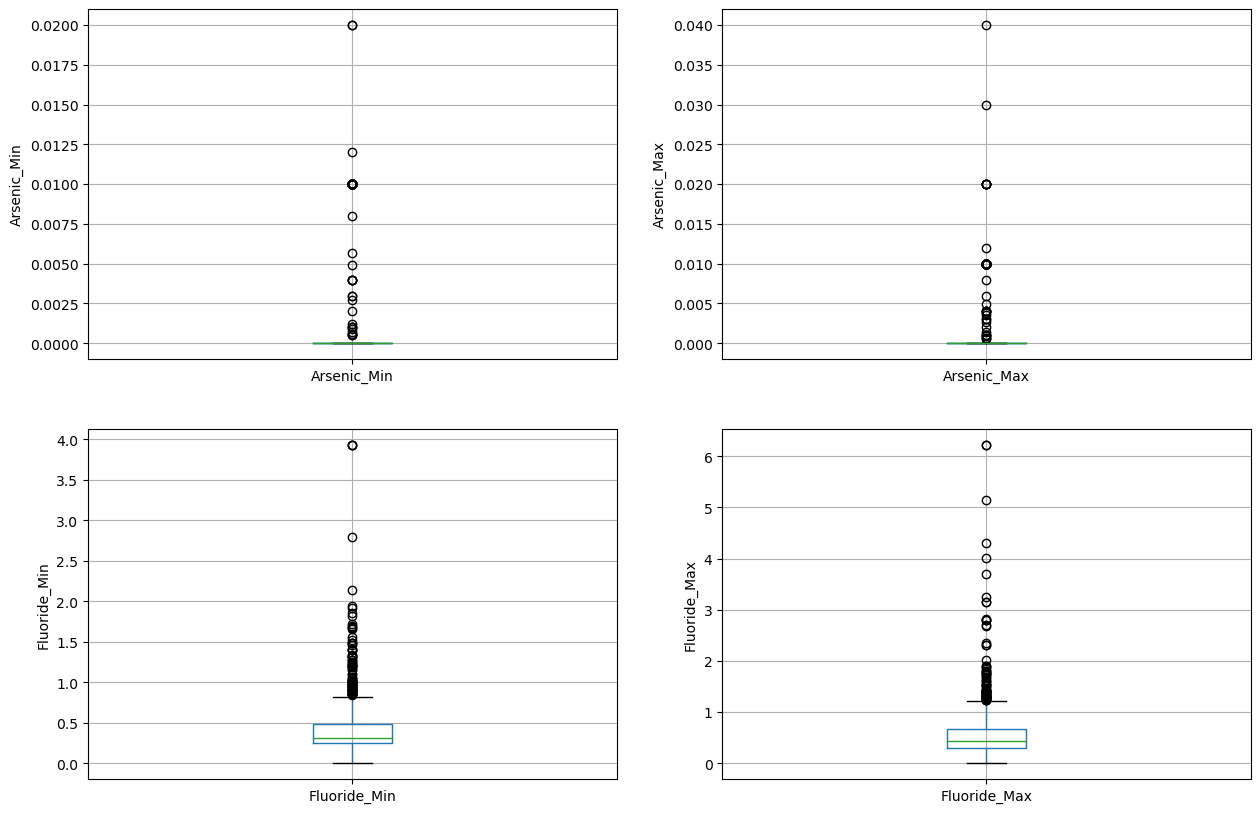

In [695]:
#72
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Arsenic_Min')
fig.set_title('')
fig.set_ylabel('Arsenic_Min')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Arsenic_Max')
fig.set_title('')
fig.set_ylabel('Arsenic_Max')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='Fluoride_Min')
fig.set_title('')
fig.set_ylabel('Fluoride_Min')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='Fluoride_Max')
fig.set_title('')
fig.set_ylabel('Fluoride_Max')
plt.show()

In [696]:
#73
df.describe()

,Temp_Min,Temp_Max,pH_Min,pH_Max,Conductivity_Min,Conductivity_Max,BOD_Min,DOB_Max,Nitrate?N + Nitrite_N Min,Nitrate?N + Nitrite_N Max,Fecal Coliform_Min,Fecal Coliform_Max,Total Coliform_Min,Total Coliform_Max,Total Dissolved Solids_Min,Total Dissolved Solids_Max,Fluoride_Min,Fluoride_Max,Arsenic_Min,Arsenic_Max,Type_BORE WELL,Type_BOREWELL,Type_GROUND WATER,Type_GROUNDWATER,Type_HAND PUMP,Type_HANDPUMP,Type_INDUSTRIAL AREA,Type_OPEN WELL,Type_OPENWELL,Type_TUBE WELL,Type_TUBEWELL,Type_WELL,Type_nan,State Name N
count,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,25.011202,27.04409,7.122631,7.447235,1256.604603,1636.455562,1.044913,1.121583,2.225355,3.747301,28.104513,38.525180,62.211305,99.245055,798.486295,1020.113411,0.394645,0.543022,0.001198,0.001297,0.062693,0.158273,0.146968,0.001028,0.071942,0.016444,0.003083,0.008222,0.009250,0.066804,0.018499,0.208633,0.228160,14.859198
std,3.890154,3.78210,0.596666,0.858734,2097.259982,2558.229677,0.955269,1.104558,3.707265,5.754482,149.342293,200.323713,246.785264,367.528056,1070.728417,1361.073466,0.388075,0.579526,0.003266,0.003749,0.242534,0.365185,0.354256,0.032059,0.258525,0.127241,0.055470,0.090348,0.095779,0.249810,0.134818,0.406541,0.419862,9.099683
min,6.000000,10.00000,4.300000,0.870000,43.000000,49.000000,0.000000,0.000000,0.000000,-9.980000,-28.000000,0.000000,0.000000,0.000000,28.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,25.00000,6.890000,7.180000,287.000000,358.000000,0.000000,0.000000,0.470000,0.760000,0.000000,0.000000,0.000000,0.000000,229.000000,308.000000,0.250000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
50%,26.000000,27.70000,7.200000,7.450000,690.000000,899.000000,1.100000,1.100000,0.920000,1.870000,2.000000,2.000000,7.000000,12.000000,502.000000,620.000000,0.310000,0.430000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000
75%,28.000000,29.00000,7.490000,7.800000,1350.000000,1753.000000,1.300000,1.400000,2.300000,4.410000,4.000000,6.100000,17.000000,25.000000,902.000000,1124.000000,0.480000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000
max,36.000000,42.00000,8.920000,14.100000,21587.639138,25872.630939,5.200000,5.600000,36.240000,46.491746,1741.722823,3800.000000,3500.000000,5899.338642,7834.245668,9634.679688,3.930000,6.220000,0.020000,0.040000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,28.000000


In [697]:
#74
import seaborn as sns

In [698]:
#75
df.shape

(973, 35)

In [699]:
#76
lb=LabelEncoder()
df['DrinkabilityN']=lb.fit_transform(df['Drinkability'])

df1['DrinkabilityN']=lb.fit_transform(df1['Drinkability'])

df.drop(columns=['Drinkability'],axis=1,inplace=True)

df1.drop(columns=['Drinkability'],axis=1,inplace=True)

In [700]:
#77
df2=df['DrinkabilityN']
df3=df1['DrinkabilityN']
df.drop(columns=['DrinkabilityN'],axis=1,inplace=True)
df1.drop(columns=['DrinkabilityN'],axis=1,inplace=True)

In [701]:
#78
from sklearn.model_selection import train_test_split

In [702]:
#79
df2.value_counts()

DrinkabilityN
1    549
0    424
Name: count, dtype: int64

In [703]:
#80
df.head(198)


,Temp_Min,Temp_Max,pH_Min,pH_Max,Conductivity_Min,Conductivity_Max,BOD_Min,DOB_Max,Nitrate?N + Nitrite_N Min,Nitrate?N + Nitrite_N Max,Fecal Coliform_Min,Fecal Coliform_Max,Total Coliform_Min,Total Coliform_Max,Total Dissolved Solids_Min,Total Dissolved Solids_Max,Fluoride_Min,Fluoride_Max,Arsenic_Min,Arsenic_Max,Type_BORE WELL,Type_BOREWELL,Type_GROUND WATER,Type_GROUNDWATER,Type_HAND PUMP,Type_HANDPUMP,Type_INDUSTRIAL AREA,Type_OPEN WELL,Type_OPENWELL,Type_TUBE WELL,Type_TUBEWELL,Type_WELL,Type_nan,State Name N
0,24.0,24.0,7.28,7.40,2300.0,2390.0,2.2,2.4,3.15,3.77,3.0,3.0,11.0,21.0,1356.0,1480.0,0.38,0.44,0.0000,0.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24.0,24.0,7.07,7.86,2140.0,2210.0,2.2,2.2,1.38,-3.42,3.0,4.0,13.0,20.0,1260.0,1328.0,0.32,0.36,0.0000,0.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20.0,21.0,7.85,8.06,1270.0,1340.0,1.8,2.0,1.31,1.43,3.0,3.0,14.0,15.0,750.0,790.0,0.26,0.30,0.0027,0.0027,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,21.0,24.0,7.20,7.50,2068.0,6410.0,1.2,1.2,3.12,6.91,9.0,9.0,53.0,53.0,1349.0,3846.0,0.50,1.20,0.0000,0.0000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,23.0,25.0,6.50,7.40,6605.0,8350.0,1.2,1.2,2.86,33.62,5.0,5.0,40.0,40.0,4310.0,5012.0,0.60,1.40,0.0000,0.0000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,26.0,27.7,6.90,7.10,690.0,899.0,1.1,1.1,0.00,0.00,2.0,2.0,7.0,12.0,572.0,600.0,0.31,0.43,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0
197,26.0,27.7,6.90,7.10,690.0,899.0,1.1,1.1,0.00,0.00,2.0,2.0,7.0,12.0,570.0,577.0,0.31,0.43,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0
198,26.0,27.7,7.10,7.20,690.0,899.0,1.1,1.1,0.64,0.72,2.0,2.0,7.0,12.0,621.0,627.0,0.31,0.43,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0
199,26.0,27.7,7.20,7.40,690.0,899.0,1.1,1.1,0.31,0.35,2.0,2.0,7.0,12.0,690.0,700.0,0.31,0.43,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0


In [704]:
#81
x_train,x_test,y_train,y_test=train_test_split(df,df2,test_size=0.3)

x_train1,x_test1,y_train1,y_test1=train_test_split(df1,df3,test_size=0.3)



# LOGISTIC REGRESSION

In [705]:
#82
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np


In [706]:
#83
from sklearn.linear_model import LogisticRegression


# instantiate the model
logit_model = LogisticRegression(solver='liblinear', random_state=0)

# fit the model
logit_model.fit(x_train, y_train)


# logit = sm.Logit(y_train, x_train)
# logit_model = logit.fit()

LogisticRegression(random_state=0, solver='liblinear')

In [707]:
#86
y_pred_test = logit_model.predict(x_test)

y_pred_test

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1])

In [708]:
#87
# probability of getting output as 0 - not drinkable

logit_model.predict_proba(x_test)[:,0]

# how would the code for getting the probability for drinkable water look like?

array([1.24793538e-02, 2.87525559e-12, 9.99870439e-01, 6.46189643e-01,
       6.12801157e-01, 2.14466878e-02, 9.64676936e-01, 1.45688530e-01,
       3.73736356e-04, 6.99305137e-07, 8.76719734e-01, 8.28700010e-03,
       2.10788568e-01, 9.18445574e-01, 1.24081668e-08, 2.75969159e-01,
       1.16556706e-04, 9.99997951e-01, 6.42051015e-01, 8.82457205e-01,
       5.33189065e-03, 1.25047387e-03, 9.94047327e-01, 1.00323050e-04,
       9.90667923e-01, 8.85772005e-01, 3.99751195e-03, 0.00000000e+00,
       9.67219611e-01, 3.99680289e-15, 4.35848106e-04, 9.75406868e-01,
       2.18073552e-02, 9.59772096e-01, 8.80256963e-01, 6.42952099e-01,
       4.22328839e-13, 2.25611353e-07, 1.16160007e-01, 8.83514888e-01,
       9.96237657e-01, 2.41465016e-04, 1.58197081e-01, 7.87985718e-01,
       2.31811026e-03, 3.38739275e-03, 7.36275581e-01, 9.88097142e-01,
       6.57775431e-01, 9.79947278e-01, 1.64992165e-02, 9.97284817e-01,
       0.00000000e+00, 7.40760194e-05, 5.07425675e-02, 1.47510232e-01,
      

In [709]:
#88
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9281


In [710]:
#89
#comparing that with the training set

y_pred_train = logit_model.predict(x_train)

y_pred_train

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [711]:
#90
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9413


In [712]:
#91
# checking for overfitting/underfitting

print('Training set score: {:.4f}'.format(logit_model.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(logit_model.score(x_test, y_test)))

Training set score: 0.9413
Test set score: 0.9281


In [713]:
#92
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from sklearn import metrics

In [714]:
#93
def draw_cm( actual, predicted ):
    ## Cret
    cm = metrics.confusion_matrix( actual, predicted)
    sn.heatmap(cm, annot=True,  fmt='.2f',
               xticklabels = ["POSITIVE", "NEGATIVE"] ,
               yticklabels = ["POSITIVE", "NEGATIVE"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

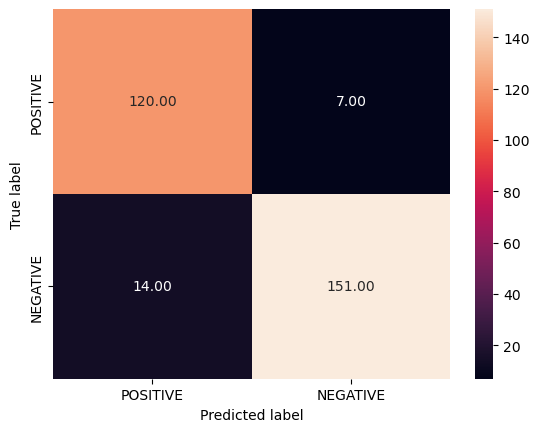

In [715]:
#94
draw_cm( y_test,
        y_pred_test)

In [716]:
#95
print( metrics.classification_report( y_test,
                                        y_pred_test ) )

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       127
           1       0.96      0.92      0.93       165

    accuracy                           0.93       292
   macro avg       0.93      0.93      0.93       292
weighted avg       0.93      0.93      0.93       292



In [717]:
#96
def draw_roc( actual, probs ):
    fpr, \
    tpr, \
    thresholds = metrics.roc_curve( actual,
                                    probs,
                                    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

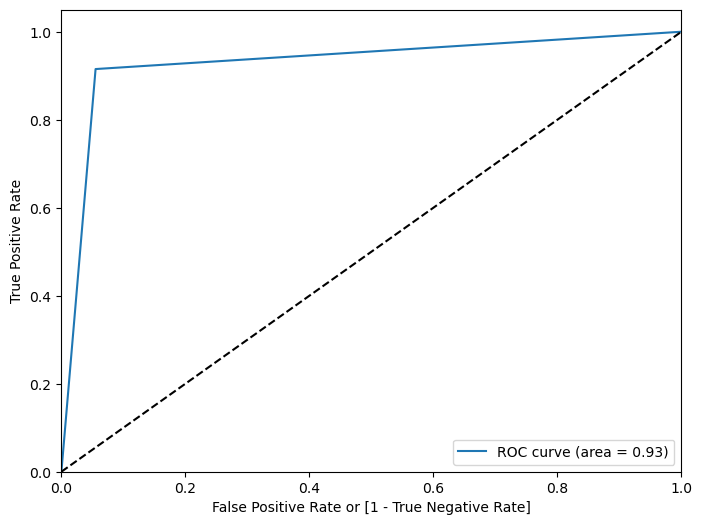

In [718]:
#97
fpr, tpr, thresholds = draw_roc( y_test,
                                y_pred_test)

In [719]:
#98
auc_score = metrics.roc_auc_score( y_test,
                                    y_pred_test  )
round( float( auc_score ), 2 )

0.93

In [720]:
#99
tpr_fpr = pd.DataFrame( { 'tpr': tpr,
                         'fpr': fpr,
                         'thresholds': thresholds } )

tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr
tpr_fpr.sort_values( 'diff', ascending = False )[0:5]

,tpr,fpr,thresholds,diff
1,0.915152,0.055118,1.0,0.860033
0,0.000000,0.000000,inf,0.000000
2,1.000000,1.000000,0.0,0.000000


In [721]:
#100
from sklearn.model_selection import cross_val_predict

In [722]:
#101
predicted_proba_cv = cross_val_predict(logit_model, x_test, y_test, cv=5, method='predict_proba')

# Extract probabilities of the positive class
positive_proba_cv = predicted_proba_cv[:, 1]

In [723]:
#102
threshold = 0.6
predicted_custom_threshold = (positive_proba_cv >= threshold).astype(int)
predicted_custom_threshold

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1])

In [724]:
#103
auc_score = metrics.roc_auc_score( y_test,
                                    predicted_custom_threshold  )
round( float( auc_score ), 2 )

0.91

In [725]:
#104
cost_df = pd.DataFrame( columns = ['prob', 'cost'])

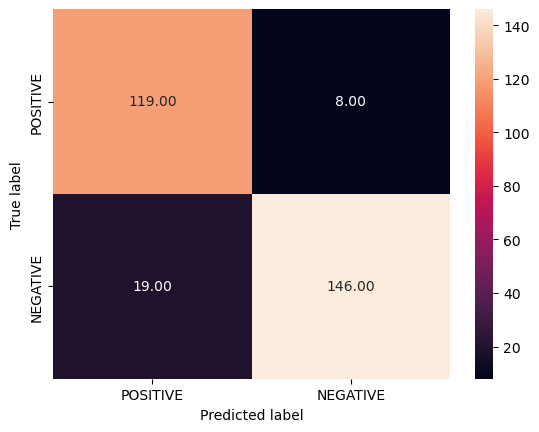

In [726]:
#105
draw_cm( y_test,
        predicted_custom_threshold )

# Decision Tree

In [727]:
#106
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 3 )

In [728]:
#107
clf_tree.fit( x_train, y_train )

DecisionTreeClassifier(max_depth=3)

In [729]:
#108
#!pip install graphviz

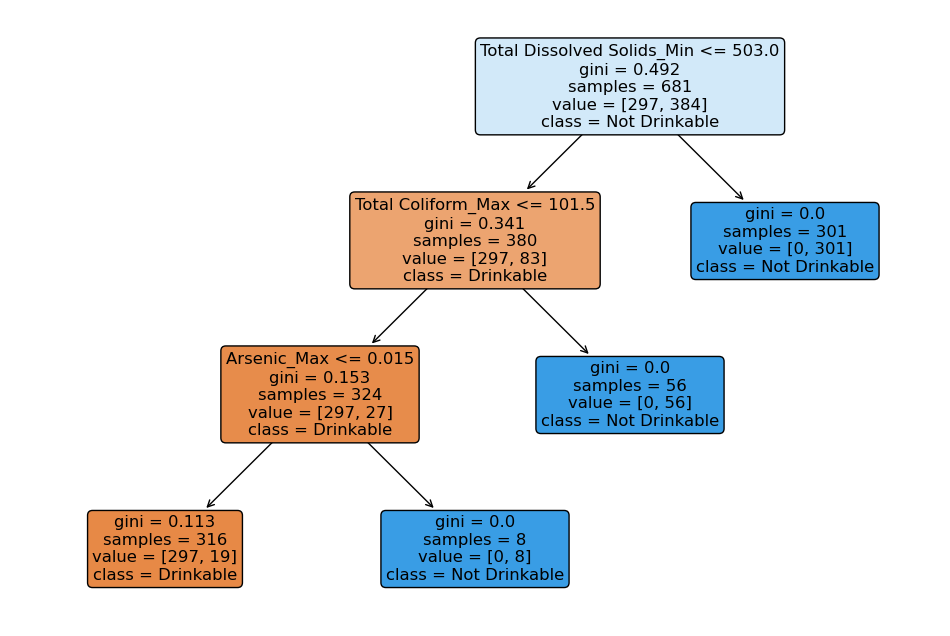

In [730]:
#109
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming you have trained your decision tree classifier clf_tree

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf_tree, filled=True, feature_names=list(x_train.columns), class_names=['Drinkable', 'Not Drinkable'], rounded=True)
plt.show()


In [731]:
#110
tree_predict = clf_tree.predict( x_test )
metrics.roc_auc_score( y_test, tree_predict )

0.9575757575757575

In [732]:
#111
print(y_train[y_train == 1].count(), y_train[y_train == 0].count())

384 297


## Why is this so good??

In [733]:
#112
gini_node_1 = 1 - pow(412/770, 2) - pow (358/770, 2)
print( round( gini_node_1, 4) )

0.4975


In [734]:
#113
x_test.shape

(292, 34)

In [735]:
#114
clf_tree_entropy = DecisionTreeClassifier( criterion = 'entropy',
                                          max_depth = 3 )
clf_tree_entropy.fit( x_train, y_train )

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [736]:
#115
import math
entropy_node_1 = - (491/700) * math.log2(491/700) - (209/700) * math.log2(209/700)
print( round( entropy_node_1, 2) )

0.88


In [737]:
#116
tree_predict = clf_tree_entropy.predict( x_test )
metrics.roc_auc_score( y_test, tree_predict )

0.9575757575757575

In [738]:
#117
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'criterion': ['gini','entropy'],
                     'max_depth': range(2,10)}]


clf_tree = DecisionTreeClassifier()

clf = GridSearchCV(clf_tree,
                 tuned_parameters,
                 cv=10,
                 scoring='roc_auc')

clf.fit(x_train, y_train )

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             scoring='roc_auc')

In [739]:
#118
clf.best_score_

0.9884985341337428

In [740]:
#119
clf.best_params_

{'criterion': 'entropy', 'max_depth': 7}

# K Nearest Neighbor


In [741]:
#120
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

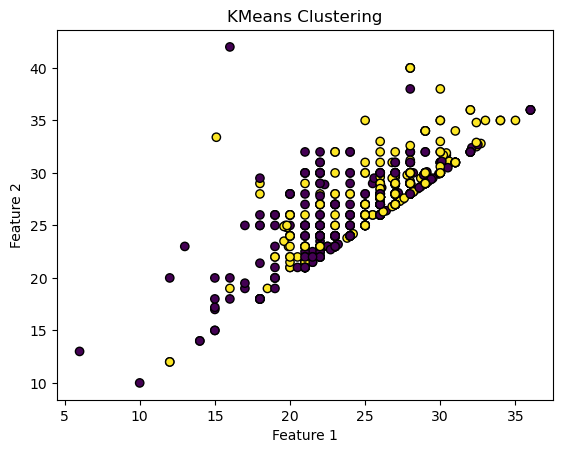

In [742]:
#121
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Assuming x_train is a Pandas DataFrame
# If it's a NumPy array, you can convert it to a DataFrame using pd.DataFrame(x_train)
# x_train = pd.DataFrame(x_train)

# Perform k-means clustering
data_for_clustering = x_train

# Create and fit the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(data_for_clustering, y_train)
# Predict the labels for the data points
cluster_labels = knn.predict(x_train.values)

# Plot the clusters
plt.scatter(
    data_for_clustering.iloc[:, 0],
    data_for_clustering.iloc[:, 1],
    c=cluster_labels,
    edgecolor='black',
    cmap='viridis'
)
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


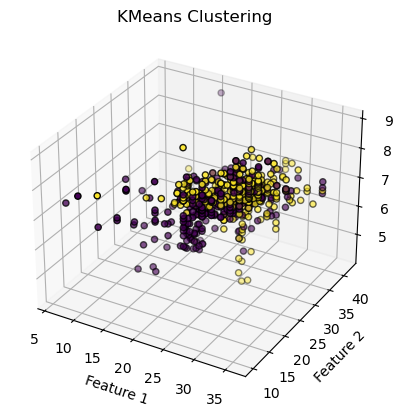

In [743]:
#122
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from mpl_toolkits.mplot3d import Axes3D

# Assuming x_train is a Pandas DataFrame
# If it's a NumPy array, you can convert it to a DataFrame using pd.DataFrame(x_train)
# x_train = pd.DataFrame(x_train)

# Perform k-means clustering
data_for_clustering = x_train

# Create and fit the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(data_for_clustering, y_train)
# Predict the labels for the data points
cluster_labels = knn.predict(x_train.values)

# Plot the clusters in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    data_for_clustering.iloc[:, 0],
    data_for_clustering.iloc[:, 1],
    data_for_clustering.iloc[:, 2],  # Use the third feature for the z-axis
    c=cluster_labels,
    edgecolor='black',
    cmap='viridis'
)
ax.set_title('KMeans Clustering')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

plt.show()


In [744]:
#123
import pandas as pd
from sklearn.cluster import KMeans
import plotly.graph_objs as go
from sklearn.neighbors import KNeighborsClassifier
from plotly.subplots import make_subplots

# Assuming x_train is a Pandas DataFrame
# If it's a NumPy array, you can convert it to a DataFrame using pd.DataFrame(x_train)
# x_train = pd.DataFrame(x_train)

# Perform k-means clustering
data_for_clustering = x_train

# Create and fit the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(data_for_clustering, y_train)
# Predict the labels for the data points
cluster_labels = knn.predict(x_train.values)

# Create a Plotly figure with a 3D scatter plot
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'scatter3d'}]])

fig.add_trace(
    go.Scatter3d(
        x=data_for_clustering.iloc[:, 0],
        y=data_for_clustering.iloc[:, 1],
        z=data_for_clustering.iloc[:, 2],
        mode='markers',
        marker=dict(
            size=5,
            color=cluster_labels,  # Color by cluster labels
            colorscale='Viridis',
            opacity=0.8
        )
    )
)

# Update layout for better visibility
fig.update_layout(
    scene=dict(
        xaxis_title='Feature 1',
        yaxis_title='Feature 2',
        zaxis_title='Feature 3'
    ),
    title='KMeans Clustering'
)

fig.show()


In [745]:
#124
y_km = knn.predict(x_test.values)

In [746]:
#125
y_km

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0])

In [747]:
#126
y_test.values

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1])

In [748]:
#127
count= 0
for i,j in zip(y_km,y_test.values):
    if(i==j):
        count+=1
print(round(count*100/y_km.size,2))

92.81


# Neural Network

In [749]:
#128
import tensorflow as tf
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy,BinaryCrossentropy

In [772]:
#129
#model.add(Input(X.shape))
model=Sequential()
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(512,activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.02)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(256,activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.02)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(256,activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.02)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(128,activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.02)))

model.add(Dense(1,activation='sigmoid'))

In [773]:
#130
model.compile(optimizer='adam',loss=BinaryCrossentropy(),metrics=['accuracy'])

In [774]:
#131
model.fit(x_train,y_train,epochs=200,verbose=True)

Epoch 1/200
22/22 [==============================] - 2s 4ms/step - loss: 15.5619 - accuracy: 0.7930
Epoch 2/200
22/22 [==============================] - 0s 3ms/step - loss: 12.0804 - accuracy: 0.8708
Epoch 3/200
22/22 [==============================] - 0s 3ms/step - loss: 9.2175 - accuracy: 0.8840
Epoch 4/200
22/22 [==============================] - 0s 3ms/step - loss: 6.9640 - accuracy: 0.9031
Epoch 5/200
22/22 [==============================] - 0s 3ms/step - loss: 5.3363 - accuracy: 0.8620
Epoch 6/200
22/22 [==============================] - 0s 3ms/step - loss: 4.1033 - accuracy: 0.8767
Epoch 7/200
22/22 [==============================] - 0s 3ms/step - loss: 3.1867 - accuracy: 0.8913
Epoch 8/200
22/22 [==============================] - 0s 3ms/step - loss: 2.4622 - accuracy: 0.9001
Epoch 9/200
22/22 [==============================] - 0s 3ms/step - loss: 2.0174 - accuracy: 0.8899
Epoch 10/200
22/22 [==============================] - 0s 3ms/step - loss: 1.6628 - accuracy: 0.8884
Epoch 1

In [780]:
#132
model.evaluate(x_train,y_train)
model.evaluate(x_test1,y_test1)

10/10 [==============================] - 0s 1ms/step - loss: 0.2170 - accuracy: 0.9663


[0.21696826815605164, 0.9663299918174744]

In [781]:
x_test.columns

Index(['Temp_Min', 'Temp_Max', 'pH_Min', 'pH_Max', 'Conductivity_Min',
       'Conductivity_Max', 'BOD_Min', 'DOB_Max', 'Nitrate?N + Nitrite_N Min',
       'Nitrate?N + Nitrite_N Max', 'Fecal Coliform_Min', 'Fecal Coliform_Max',
       'Total Coliform_Min', 'Total Coliform_Max',
       'Total Dissolved Solids_Min', 'Total Dissolved Solids_Max',
       'Fluoride_Min', 'Fluoride_Max', 'Arsenic_Min', 'Arsenic_Max',
       'Type_BORE WELL', 'Type_BOREWELL', 'Type_GROUND WATER',
       'Type_GROUNDWATER', 'Type_HAND PUMP', 'Type_HANDPUMP',
       'Type_INDUSTRIAL AREA', 'Type_OPEN WELL', 'Type_OPENWELL',
       'Type_TUBE WELL', 'Type_TUBEWELL', 'Type_WELL', 'Type_nan',
       'State Name N'],
      dtype='object')

In [782]:
new_order=['Temp_Min', 'Temp_Max', 'pH_Min', 'pH_Max', 'Conductivity_Min',
       'Conductivity_Max', 'BOD_Min', 'DOB_Max', 'Nitrate?N + Nitrite_N Min',
       'Nitrate?N + Nitrite_N Max', 'Fecal Coliform_Min', 'Fecal Coliform_Max',
       'Total Coliform_Min', 'Total Coliform_Max',
       'Total Dissolved Solids_Min', 'Total Dissolved Solids_Max',
       'Fluoride_Min', 'Fluoride_Max', 'Arsenic_Min', 'Arsenic_Max',
       'Type_BORE WELL', 'Type_BOREWELL', 'Type_GROUND WATER',
       'Type_GROUNDWATER', 'Type_HAND PUMP', 'Type_HANDPUMP',
       'Type_INDUSTRIAL AREA', 'Type_OPEN WELL', 'Type_OPENWELL',
       'Type_TUBE WELL', 'Type_TUBEWELL', 'Type_WELL', 'Type_nan',
       'State Name N']
# Add missing columns to the dataframe
dftest['Type_BOREWELL'] = False
dftest['Type_OPEN WELL'] = False
dftest['Type_OPENWELL'] = False


In [764]:
columns_dftest = set(dftest.columns)
columns_x_train = set(x_train.columns)

extra_columns_dftest = columns_dftest - columns_x_train
extra_columns_x_train = columns_x_train- columns_dftest

In [765]:
dftest = dftest.drop(columns=list(extra_columns_dftest))
x_train = x_train.drop(columns=list(extra_columns_x_train))

In [783]:

# Perform predictions using the reordered dataframe
dftest = dftest[x_train.columns]  # Reorder the columns to match the training data
dftest['Type_INDUSTRIAL AREA'] = False
dftest['Type_TUBEWELL'] = False
predictions = clf.predict(dftest)

def change(x):
    if x:
        return 'Not Drinkable'
    else: 
        return 'Drinkable'
# Convert predictions into a DataFrame
predictions_df = pd.DataFrame(predictions, columns=['Predicted_Output'])
predictions_df['Station Code'] = stationcode
predictions_df = predictions_df[['Station Code',"Predicted_Output"]]
predictions_df.set_index(['Station Code'],inplace = True)
predictions_df['Predicted_Output'] = predictions_df['Predicted_Output'].apply(change)
predictions_df.rename(columns={'Predicted_Output':"Drinkability"},inplace=True)
predictions_df.to_csv('samplee.csv')



In [786]:
dftest.to_csv('sample.csv')

In [785]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load datasets
train_data = pd.read_csv('water_quality_train_.csv')
test_data = pd.read_csv("water_quality_test_.csv")




# Data preprocessing
# Drop irrelevant columns, handle missing values, convert categorical variables, etc.

# Feature Engineering
# You might need to extract features or engineer new features based on domain knowledge

# Train-Test Split
# x_train = x_train.drop(columns=["Station Code", "Name of Monitoring Location", "State Name", "Drinkability"])
#y_train = y_train["Drinkability"]
x_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection and Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Model Evaluation
y_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

# Prediction on test data
test_features = test_data.drop(columns=["Station Code", "Name of Monitoring Location", "State Name"])
predictions = model.predict(dftest)

# Output Formatting
output_df = pd.DataFrame({"Station Code": test_data["Station Code"], "Drinkable": predictions})
output_df.to_csv("predictions.csv", index=False)


TypeError: float() argument must be a string or a real number, not 'NAType'